In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import IsolationForest
from joblib import dump

In [7]:
# load csv files into dataframes for analysis
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train

,mean,sd
0,0.564877,0.231592
1,-0.118285,0.020446
2,-0.157953,-0.106749
3,-0.157953,-0.106749
4,-0.157953,-0.106242
...,...,...
64222,-0.062751,-0.106749
64223,-0.157953,-0.106749
64224,-0.157953,-0.106749
64225,-0.078618,0.072922


In [9]:
df_test

,mean,sd
0,-0.157953,-0.106749
1,-0.157953,-0.106749
2,-0.157953,-0.106242
3,-0.284889,-0.106749
4,-0.157953,-0.106242
...,...,...
16052,-0.157953,-0.106242
16053,-0.157953,-0.106242
16054,-0.038950,0.020446
16055,-0.157953,-0.106242


In [56]:
iso_forest = IsolationForest(n_estimators = 100, random_state=16)

In [57]:
iso_forest.fit(df_train)

IsolationForest(random_state=16)

In [58]:
predictions = iso_forest.predict(df_train)

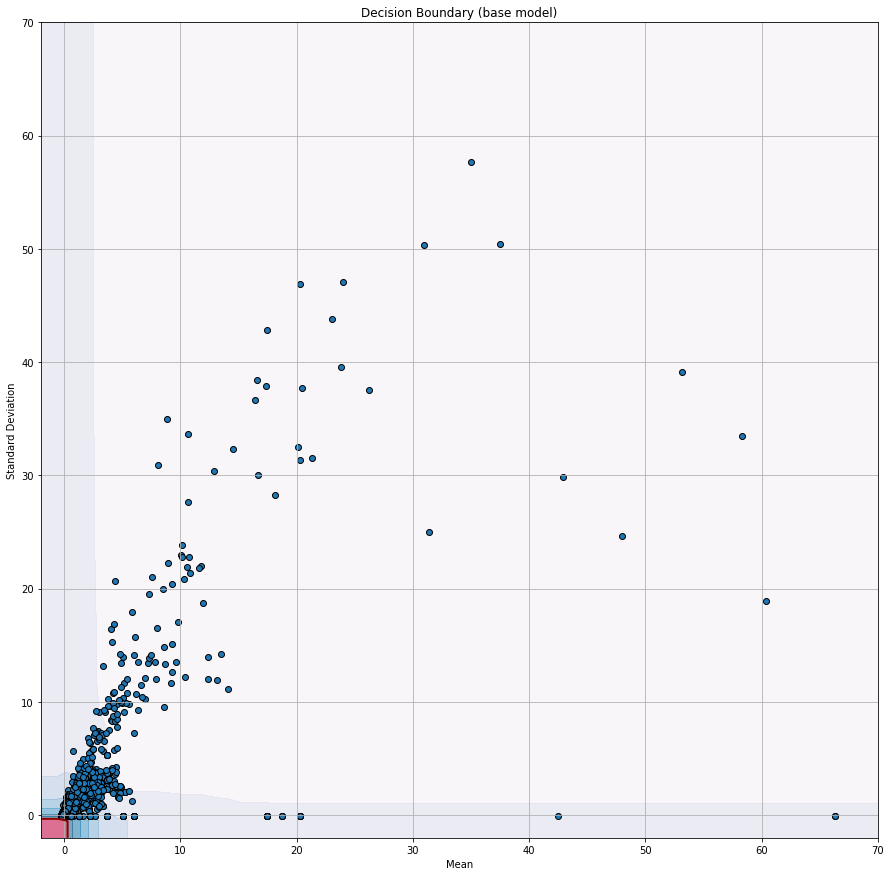

In [59]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_train.iloc[:, 0],
            df_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

In [60]:
iso_forest = IsolationForest(n_estimators = 100, random_state=16, contamination=0.001)

In [61]:
iso_forest.fit(df_train)

IsolationForest(contamination=0.001, random_state=16)

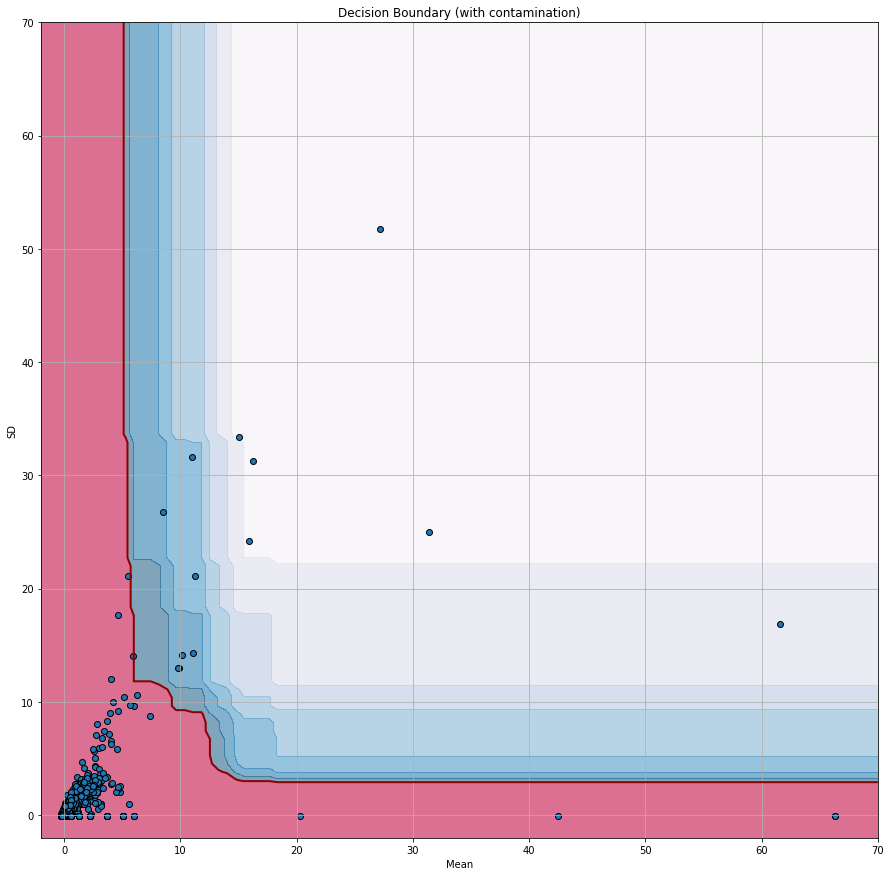

In [62]:
# Plot of the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_test.iloc[:, 0],
            df_test.iloc[:, 1],
            cmap = matplotlib.colors.ListedColormap(['blue', 'red']), edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [67]:
predictions = iso_forest.predict(df_test)

In [68]:
df_predictions = pd.concat([df_test, pd.Series(predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'outlier']

In [70]:
df_predictions

,mean,sd,outlier
0,-0.157953,-0.106749,1
1,-0.157953,-0.106749,1
2,-0.157953,-0.106242,1
3,-0.284889,-0.106749,1
4,-0.157953,-0.106242,1
...,...,...,...
16052,-0.157953,-0.106242,1
16053,-0.157953,-0.106242,1
16054,-0.038950,0.020446,1
16055,-0.157953,-0.106242,1


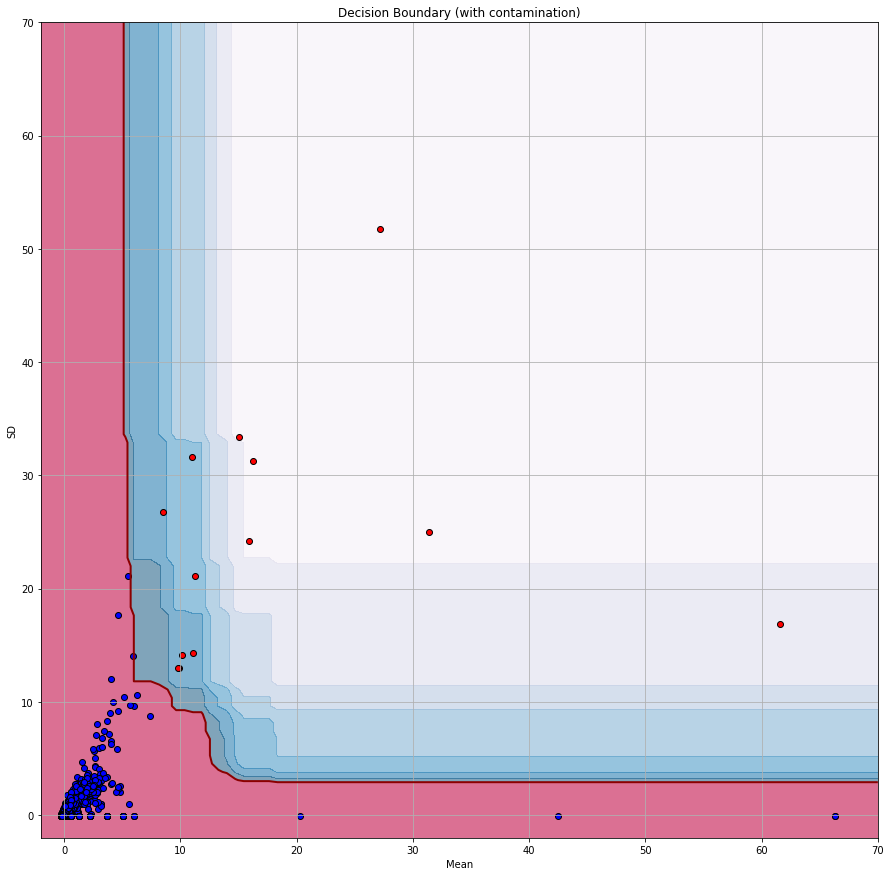

In [69]:
# Plot of the test dataset and the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_predictions[df_predictions['outlier'] == 1 ].iloc[:, 0],
                 df_predictions[df_predictions['outlier'] == 1 ].iloc[:, 1],
                 c='blue', edgecolors='k')

plt.scatter(df_predictions[df_predictions['outlier'] == -1 ].iloc[:, 0],
                 df_predictions[df_predictions['outlier'] == -1 ].iloc[:, 1],
                 c='red', edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [73]:
# export the trained model

dump(iso_forest, 'model.joblib')

['model.joblib']